IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import tensorflow as tf

IMPORT DATA

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
user = pd.read_csv('users.csv')

In [66]:
train['open_flag'].describe()

count    73539.000000
mean         0.155781
std          0.362650
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: open_flag, dtype: float64

In [100]:
test.shape

(55970, 17)

CHANGE ATTRIBTUTES TO 'OBJECT' PANDAS CLASS

In [3]:
user['attr_1'] = user['attr_1'].astype('object')
user['attr_2'] = user['attr_2'].astype('object')
user['attr_3'] = user['attr_3'].astype('object')

In [4]:
user['age'] = pd.cut(user['age'],
                     bins = [0,20,40,60,80,100],
                     labels=[1,2,3,4,5])
user['age'] = pd.to_numeric(user['age'],errors='coerce')
user['age'] = user['age'].astype('object')

CHANGE COUNTRY CODES TO 'OBJECT' PANDAS CLASS

In [5]:
train['country_code'] = train['country_code'].astype('object')
#test['country_code'] = test['country_code'].astype('object')

CHANGE THE DATE TO DAY OF THE WEEK AND CHANGE TO 'OBJECT' PANDAS CLASS

In [6]:
train['grass_date'] = pd.to_datetime(train['grass_date'], infer_datetime_format=True)
#test['grass_date'] = pd.to_datetime(test['grass_date'], infer_datetime_format=True)

In [7]:
train['grass_date']=train['grass_date'].dt.dayofweek
train['grass_date']=train['grass_date'].astype('object')
#test['grass_date']=test['grass_date'].dt.dayofweek
#test['grass_date']=test['grass_date'].astype('object')

CHANGE 'NEVER OPEN/CHECKOUT' TO NAs AND INTO INTEGERS TO CUT INTO BINS

In [8]:
train['last_open_day'] = pd.to_numeric(train['last_open_day'],errors='coerce')
train['last_login_day'] = pd.to_numeric(train['last_login_day'],errors='coerce')
train['last_checkout_day'] = pd.to_numeric(train['last_checkout_day'],errors='coerce')
train['last_open_day'] = train['last_open_day'].astype('Int64')
train['last_login_day'] =train['last_login_day'].astype('Int64')
train['last_checkout_day'] =train['last_checkout_day'].astype('Int64')

In [9]:
#test['last_open_day'] = pd.to_numeric(test['last_open_day'],errors='coerce')
#test['last_login_day'] = pd.to_numeric(test['last_login_day'],errors='coerce')
#test['last_checkout_day'] = pd.to_numeric(test['last_checkout_day'],errors='coerce')
#test['last_open_day'] = test['last_open_day'].astype('Int64')
#test['last_login_day'] = test['last_login_day'].astype('Int64')
#test['last_checkout_day'] = test['last_checkout_day'].astype('Int64')

CHANGE INTO 'OBJECT' PANDAS CLASS

In [9]:
train['last_open_day'] = pd.cut(train['last_open_day'], 4, labels=[1,2,3,4])
train['last_open_day'] = pd.to_numeric(train['last_open_day'],errors='coerce')
train['last_open_day'] = train['last_open_day'].astype('object')
train['last_open_day'] = train['last_open_day'].fillna('0')

In [10]:
train['last_login_day'] = pd.cut(train['last_login_day'], 4, labels=[1,2,3,4])
train['last_login_day'] = pd.to_numeric(train['last_login_day'],errors='coerce')
train['last_login_day'] = train['last_login_day'].astype('object')
train['last_login_day'] = train['last_login_day'].fillna('0')

In [11]:
train['last_checkout_day'] = pd.cut(train['last_checkout_day'], 4, labels=[1,2,3,4])
train['last_checkout_day'] = pd.to_numeric(train['last_checkout_day'],errors='coerce')
train['last_checkout_day'] = train['last_checkout_day'].astype('object')
train['last_checkout_day'] = train['last_checkout_day'].fillna('0')

MERGE THE 2 DATASETS ON USERID

In [12]:
train_merge = pd.merge(train, user, on='user_id')
#test_merge = pd.merge(test, user, on='user_id')

I REORGANISED INTO AN ORDER I LIKE BETTER

In [13]:
col = list(train_merge.columns)
col = col[17:18] + col[2:3] + col[1:2] + col[0:1] + col[3:16] + col[18:23] + col[16:17]
train_merge = train_merge[col]

In [14]:
train_merge.tail()

,row_id,user_id,grass_date,country_code,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_1,attr_2,attr_3,age,domain,open_flag
73534,73534,127613,0,6,39,1,1,1,0,1,1,0,0,0,0,0,0,NaN,1,0,NaN,@hotmail.com,0
73535,73535,127620,0,2,38,1,1,1,0,0,1,0,0,0,0,0,0,1,1,2,2,@gmail.com,0
73536,73536,127696,0,2,32,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,@gmail.com,0
73537,73537,127807,0,2,38,1,1,0,2,4,4,0,0,0,0,0,0,1,1,1,2,@gmail.com,1
73538,73538,127880,0,6,39,1,1,0,2,2,3,0,0,0,0,0,0,NaN,1,0,NaN,@gmail.com,0


GET DUMMIES FOR THE CATEGORICAL

In [15]:
df1 = train_merge.filter(['grass_date','country_code','last_open_day','last_login_day','last_checkout_day','attr_1','attr_2','attr_3','age','domain'])
df1 = pd.get_dummies(df1,
                     prefix=['grass_date','country_code','last_open_day','last_login_day','last_checkout_day','attr_1','attr_2','attr_3','age','domain'],
                     dummy_na=True)
df1.head()

,grass_date_0.0,grass_date_1.0,grass_date_2.0,grass_date_3.0,grass_date_4.0,grass_date_5.0,grass_date_6.0,grass_date_nan,country_code_1.0,country_code_2.0,country_code_3.0,country_code_4.0,country_code_5.0,country_code_6.0,country_code_7.0,country_code_nan,last_open_day_1.0,last_open_day_2.0,last_open_day_3.0,last_open_day_4.0,last_open_day_0,last_open_day_nan,last_login_day_1.0,last_login_day_4.0,last_login_day_0,last_login_day_nan,last_checkout_day_1.0,last_checkout_day_2.0,last_checkout_day_3.0,last_checkout_day_4.0,last_checkout_day_0,last_checkout_day_nan,attr_1_0.0,attr_1_1.0,attr_1_nan,attr_2_0.0,attr_2_1.0,attr_2_nan,attr_3_0.0,attr_3_1.0,attr_3_2.0,attr_3_3.0,attr_3_4.0,attr_3_nan,age_1.0,age_2.0,age_3.0,age_4.0,age_5.0,age_nan,domain_@163.com,domain_@gmail.com,domain_@hotmail.com,domain_@icloud.com,domain_@live.com,domain_@outlook.com,domain_@qq.com,domain_@rocketmail.com,domain_@yahoo.com,domain_@ymail.com,domain_other,domain_nan
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


SCALE FOR THE CONTINUOUS

In [16]:
df2 = train_merge.drop(['grass_date','country_code','last_open_day','last_login_day','last_checkout_day','attr_1','attr_2','attr_3','age','domain'],axis=1)
col_names = df2.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = pd.DataFrame(sc.fit_transform(df2[col_names[2:12]]), columns=col_names[2:12])
df2.head()

,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
0,0.030628,-0.519845,-0.170770,-0.128997,0.269489,0.468020,0.696051,-0.315128,0.286749,0.327540
1,0.030628,0.620380,1.360888,1.516103,0.716438,0.600111,0.570736,0.031205,-0.233676,-0.101642
2,0.476291,-0.519845,0.266846,0.883372,1.163387,1.154889,0.974529,1.416536,2.108240,1.543556
3,0.476291,-0.519845,-0.608387,-0.508635,0.046014,-0.060340,0.278333,0.031205,0.026536,0.041419
4,0.476291,-0.519845,-0.608387,-0.635181,-0.475426,-0.535865,-0.612798,-0.315128,-0.363783,-0.387763


COMBINE IT BACK TO FORM THE PREPROCESSED DATA

In [17]:
df = pd.concat([train_merge[col_names[0:2]],df1, df2,train_merge['open_flag']], axis=1)
df.head()

,row_id,user_id,grass_date_0.0,grass_date_1.0,grass_date_2.0,grass_date_3.0,grass_date_4.0,grass_date_5.0,grass_date_6.0,grass_date_nan,country_code_1.0,country_code_2.0,country_code_3.0,country_code_4.0,country_code_5.0,country_code_6.0,country_code_7.0,country_code_nan,last_open_day_1.0,last_open_day_2.0,last_open_day_3.0,last_open_day_4.0,last_open_day_0,last_open_day_nan,last_login_day_1.0,last_login_day_4.0,last_login_day_0,last_login_day_nan,last_checkout_day_1.0,last_checkout_day_2.0,last_checkout_day_3.0,last_checkout_day_4.0,last_checkout_day_0,last_checkout_day_nan,attr_1_0.0,attr_1_1.0,attr_1_nan,attr_2_0.0,attr_2_1.0,attr_2_nan,attr_3_0.0,attr_3_1.0,attr_3_2.0,attr_3_3.0,attr_3_4.0,attr_3_nan,age_1.0,age_2.0,age_3.0,age_4.0,age_5.0,age_nan,domain_@163.com,domain_@gmail.com,domain_@hotmail.com,domain_@icloud.com,domain_@live.com,domain_@outlook.com,domain_@qq.com,domain_@rocketmail.com,domain_@yahoo.com,domain_@ymail.com,domain_other,domain_nan,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag
0,0,43,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.030628,-0.519845,-0.170770,-0.128997,0.269489,0.468020,0.696051,-0.315128,0.286749,0.327540,0
1,1,102,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.030628,0.620380,1.360888,1.516103,0.716438,0.600111,0.570736,0.031205,-0.233676,-0.101642,1
2,2,177,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.476291,-0.519845,0.266846,0.883372,1.163387,1.154889,0.974529,1.416536,2.108240,1.543556,0
3,3,184,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.476291,-0.519845,-0.608387,-0.508635,0.046014,-0.060340,0.278333,0.031205,0.026536,0.041419,0
4,4,221,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.476291,-0.519845,-0.608387,-0.635181,-0.475426,-0.535865,-0.612798,-0.315128,-0.363783,-0.387763,0


In [18]:
df.shape

(73539, 75)

I DONT THINK USERID AND ROWID IS USEFUL IN ANYWAY SO I REMOVED THEM AND ALSO THE RESULT COLUMN FOR X. Y IS THE RESULT COLUMN

In [93]:
X = df.iloc[:, 2:74].values
y = df.iloc[:, -1].values

In [20]:
X.shape

(73539, 72)

SPLIT TO TEST AND TRAIN

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

FINDING THE NUMBER OF COMPONENTS TO EXPLAIN 95% OF VARIANCE. IS ABOUT 16

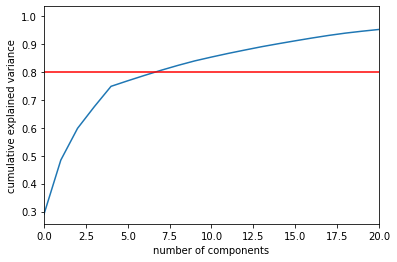

In [23]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

plt.xlim(0,20)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.axhline(y=0.80,color='r')

ratio : [0.29140331 0.19298492 0.11382368 0.077477   0.07306424 0.01993435
 0.01925129 0.0185513  0.01738476 0.01606588 0.01374863 0.01307217
 0.0121943  0.01187653 0.01075513 0.01033585 0.00998977 0.00933671
 0.00824403 0.00687764 0.00622272 0.00591952 0.00474177 0.00426619
 0.00421875]
cum_var: [0.29140331 0.48438824 0.59821192 0.67568892 0.74875316 0.7686875
 0.78793879 0.80649008 0.82387485 0.83994073 0.85368936 0.86676153
 0.87895583 0.89083236 0.9015875  0.91192334 0.92191311 0.93124983
 0.93949386 0.9463715  0.95259423 0.95851375 0.96325552 0.96752171
 0.97174046]


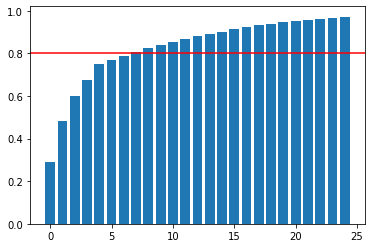

In [69]:
n = 25
pca = PCA(n_components = n)

pr_components = pca.fit_transform(X)

ratios = pca.explained_variance_ratio_
cum_var = np.cumsum(ratios)
print(f"ratio : {ratios}")
print(f"cum_var: {cum_var}")

plt.axhline(y=0.80,color='r')
plt.bar(range(n), cum_var)
plt.show()

TRANSFORM THE INPUTS USING THE CHOSEN PCA

In [95]:
chosen_pca = PCA(n_components = 16)
X_train = chosen_pca.fit_transform(X_train)
X_test = chosen_pca.transform(X_test)

CREATE THE NEURAL NETWORK

In [111]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(1e-3/2)
ann.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

opt = tf.keras.optimizers.Adam(1e-3)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, mode='auto')

ann.fit(X_train, y_train, batch_size = 64, epochs = 50, callbacks=[early_stop], validation_data= (X_test,y_test))

Epoch 1/50
920/920 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8676 - val_loss: 0.3124 - val_accuracy: 0.8786
Epoch 2/50
920/920 [==============================] - 1s 2ms/step - loss: 0.3101 - accuracy: 0.8784 - val_loss: 0.3078 - val_accuracy: 0.8801
Epoch 3/50
920/920 [==============================] - 1s 2ms/step - loss: 0.3065 - accuracy: 0.8796 - val_loss: 0.3053 - val_accuracy: 0.8813
Epoch 4/50
920/920 [==============================] - 1s 2ms/step - loss: 0.3042 - accuracy: 0.8801 - val_loss: 0.3032 - val_accuracy: 0.8805
Epoch 5/50
920/920 [==============================] - 1s 2ms/step - loss: 0.3026 - accuracy: 0.8807 - val_loss: 0.3022 - val_accuracy: 0.8804
Epoch 6/50
920/920 [==============================] - 1s 1ms/step - loss: 0.3010 - accuracy: 0.8807 - val_loss: 0.3015 - val_accuracy: 0.8814
Epoch 7/50
920/920 [==============================] - 1s 1ms/step - loss: 0.2996 - accuracy: 0.8813 - val_loss: 0.2994 - val_accuracy: 0.8812
Epoch 

VALIDATION

In [112]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12034   365]
 [ 1310   999]]


MAKE PREDICTIONS (PREPARE THE TEST SET)

In [29]:
test['grass_date'] = pd.to_datetime(test['grass_date'], infer_datetime_format=True)
test['grass_date']=test['grass_date'].dt.dayofweek
test['grass_date']=test['grass_date'].astype('object')

test['country_code'] = test['country_code'].astype('object')

In [30]:
test['last_open_day'] = pd.to_numeric(test['last_open_day'],errors='coerce')
test['last_login_day'] = pd.to_numeric(test['last_login_day'],errors='coerce')
test['last_checkout_day'] = pd.to_numeric(test['last_checkout_day'],errors='coerce')
test['last_open_day'] = test['last_open_day'].astype('Int64')
test['last_login_day'] = test['last_login_day'].astype('Int64')
test['last_checkout_day'] = test['last_checkout_day'].astype('Int64')

In [31]:
test['last_open_day'] = pd.cut(test['last_open_day'], 4, labels=[1,2,3,4])
test['last_open_day'] = pd.to_numeric(test['last_open_day'],errors='coerce')
test['last_open_day'] = test['last_open_day'].astype('object')
test['last_open_day'] = test['last_open_day'].fillna('0')

In [32]:
test['last_login_day'] = pd.cut(test['last_login_day'], 4, labels=[1,2,3,4])
test['last_login_day'] = pd.to_numeric(test['last_login_day'],errors='coerce')
test['last_login_day'] = test['last_login_day'].astype('object')
test['last_login_day'] = test['last_login_day'].fillna('0')

In [33]:
test['last_checkout_day'] = pd.cut(test['last_checkout_day'], 4, labels=[1,2,3,4])
test['last_checkout_day'] = pd.to_numeric(test['last_checkout_day'],errors='coerce')
test['last_checkout_day'] = test['last_checkout_day'].astype('object')
test['last_checkout_day'] = test['last_checkout_day'].fillna('0')

In [34]:
test_merge = pd.merge(test, user, on='user_id')

In [35]:
test_merge.shape

(55970, 22)

In [36]:
col_test = list(test_merge.columns)
col_test = col_test[16:17] + col_test[2:3] + col_test[1:2] + col_test[0:1] + col_test[3:16] + col[17:22]
test_merge = test_merge[col_test]

In [37]:
test_merge.head()

,row_id,user_id,grass_date,country_code,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_1,attr_2,attr_3,age,domain
0,0,0,1,6,35,1,1,1,2,3,4,10,34,134,0,6,18,NaN,1,0,NaN,@gmail.com
1,1,130,1,6,35,1,1,2,1,1,1,5,5,5,0,0,0,NaN,1,0,NaN,@gmail.com
2,2,150,1,5,25,1,1,1,0,0,0,13,19,38,2,2,2,1,1,2,2,@gmail.com
3,3,181,1,1,36,1,1,1,0,0,0,43,110,173,2,5,5,1,1,2,2,@yahoo.com
4,4,192,1,5,23,1,1,1,0,0,0,4,12,39,0,0,2,NaN,1,0,NaN,@gmail.com


In [38]:
df3 = test_merge.filter(['grass_date','country_code','last_open_day','last_login_day','last_checkout_day','attr_1','attr_2','attr_3','age','domain'])
df3 = pd.get_dummies(df3,
                     prefix=['grass_date','country_code','last_open_day','last_login_day','last_checkout_day','attr_1','attr_2','attr_3','age','domain'],
                     dummy_na=True)
df3.head()

,grass_date_0.0,grass_date_1.0,grass_date_2.0,grass_date_3.0,grass_date_4.0,grass_date_5.0,grass_date_6.0,grass_date_nan,country_code_1.0,country_code_2.0,country_code_3.0,country_code_4.0,country_code_5.0,country_code_6.0,country_code_7.0,country_code_nan,last_open_day_1.0,last_open_day_2.0,last_open_day_3.0,last_open_day_4.0,last_open_day_0,last_open_day_nan,last_login_day_1.0,last_login_day_4.0,last_login_day_0,last_login_day_nan,last_checkout_day_1.0,last_checkout_day_2.0,last_checkout_day_3.0,last_checkout_day_4.0,last_checkout_day_0,last_checkout_day_nan,attr_1_0.0,attr_1_1.0,attr_1_nan,attr_2_0.0,attr_2_1.0,attr_2_nan,attr_3_0.0,attr_3_1.0,attr_3_2.0,attr_3_3.0,attr_3_4.0,attr_3_nan,age_1.0,age_2.0,age_3.0,age_4.0,age_5.0,age_nan,domain_@163.com,domain_@gmail.com,domain_@hotmail.com,domain_@icloud.com,domain_@live.com,domain_@outlook.com,domain_@qq.com,domain_@rocketmail.com,domain_@yahoo.com,domain_@ymail.com,domain_other,domain_nan
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [39]:
df3.shape

(55970, 62)

In [40]:
df4 = test_merge.drop(['grass_date','country_code','last_open_day','last_login_day','last_checkout_day','attr_1','attr_2','attr_3','age','domain'],axis=1)
col_test_names = df4.columns
col_test_names

Index(['row_id', 'user_id', 'subject_line_length', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days'],
      dtype='object')

In [41]:
df4 = test_merge.drop(['grass_date','country_code','last_open_day','last_login_day','last_checkout_day','attr_1','attr_2','attr_3','age','domain'],axis=1)
col_names = df4.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df4 = pd.DataFrame(sc.fit_transform(df4[col_test_names[2:12]]), columns=col_test_names[2:12])
df4.head()

,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
0,-0.587544,0.699230,0.116595,-0.146192,0.073062,0.199898,1.136414,-0.321274,0.339208,0.847721
1,-0.587544,0.128769,-0.301217,-0.477559,-0.284701,-0.551936,-0.623752,-0.321274,-0.392734,-0.416894
2,-1.402140,-0.441692,-0.510124,-0.588015,0.287721,-0.188982,-0.173477,0.250045,-0.148753,-0.276381
3,-0.506084,-0.441692,-0.510124,-0.588015,2.434301,2.170224,1.668557,0.250045,0.217218,-0.065612
4,-1.565059,-0.441692,-0.510124,-0.588015,-0.356254,-0.370459,-0.159832,-0.321274,-0.392734,-0.276381


In [42]:
df_test = pd.concat([test_merge[col_test_names[0:2]],df3, df4], axis=1)
df_test.tail()

,row_id,user_id,grass_date_0.0,grass_date_1.0,grass_date_2.0,grass_date_3.0,grass_date_4.0,grass_date_5.0,grass_date_6.0,grass_date_nan,country_code_1.0,country_code_2.0,country_code_3.0,country_code_4.0,country_code_5.0,country_code_6.0,country_code_7.0,country_code_nan,last_open_day_1.0,last_open_day_2.0,last_open_day_3.0,last_open_day_4.0,last_open_day_0,last_open_day_nan,last_login_day_1.0,last_login_day_4.0,last_login_day_0,last_login_day_nan,last_checkout_day_1.0,last_checkout_day_2.0,last_checkout_day_3.0,last_checkout_day_4.0,last_checkout_day_0,last_checkout_day_nan,attr_1_0.0,attr_1_1.0,attr_1_nan,attr_2_0.0,attr_2_1.0,attr_2_nan,attr_3_0.0,attr_3_1.0,attr_3_2.0,attr_3_3.0,attr_3_4.0,attr_3_nan,age_1.0,age_2.0,age_3.0,age_4.0,age_5.0,age_nan,domain_@163.com,domain_@gmail.com,domain_@hotmail.com,domain_@icloud.com,domain_@live.com,domain_@outlook.com,domain_@qq.com,domain_@rocketmail.com,domain_@yahoo.com,domain_@ymail.com,domain_other,domain_nan,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
55965,55965,127348,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.878729,-0.441692,-0.510124,-0.588015,-0.642464,-0.681563,-0.691976,-0.321274,-0.392734,-0.416894
55966,55966,127396,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.878729,-0.441692,-0.510124,-0.477559,-0.642464,-0.681563,-0.691976,-0.321274,-0.392734,-0.416894
55967,55967,127574,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.064133,-0.441692,-0.510124,-0.588015,-0.642464,-0.681563,-0.691976,-0.321274,-0.392734,-0.416894
55968,55968,127887,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.064133,0.699230,0.534407,0.958367,-0.642464,-0.681563,-0.691976,-0.321274,-0.392734,-0.416894
55969,55969,127895,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.878729,0.699230,2.414562,2.394293,-0.642464,-0.681563,-0.691976,-0.321274,-0.392734,-0.416894


In [43]:
df_test.shape

(55970, 74)

In [114]:
test_input = df_test.iloc[:, 2:].values
test_input.shape

(55970, 72)

In [115]:
test_input = chosen_pca.transform(test_input)

ACTUAL PREDICTIONS

In [116]:
y_pred = ann.predict(test_input)
y_pred = (y_pred > 0.5)
y_pred = [val for sublist in y_pred for val in sublist]

In [117]:
test['open_flag'] = y_pred
test.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,open_flag
0,6,1,0,35,1,1,1,2,3,4,10,34,134,0,6,18,0,False
1,6,1,130,35,1,1,2,1,1,1,5,5,5,0,0,0,1,False
2,5,1,150,25,1,1,1,0,0,0,13,19,38,2,2,2,2,False
3,1,1,181,36,1,1,1,0,0,0,43,110,173,2,5,5,3,False
4,5,1,192,23,1,1,1,0,0,0,4,12,39,0,0,2,4,False


In [118]:
submission = test.filter(['row_id','open_flag'])
submission['open_flag']=submission['open_flag'].astype(int)
submission.head()          

,row_id,open_flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [119]:
submission['open_flag'].describe()

count    55970.000000
mean         0.086332
std          0.280856
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: open_flag, dtype: float64

In [106]:
submission.to_csv('waterloo2.csv',index=False)